In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.Series(iris.target)
#


In [ ]:
iris.target_names

In [ ]:
X

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=30)
x_train.shape


In [ ]:
#decission tree
model=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2)
model.fit(x_train,y_train)


In [ ]:
model.classes_

In [ ]:
y_pred=model.predict(x_test)


In [ ]:
print(accuracy_score(y_pred,y_test))

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(model,filled=True,feature_names=iris.feature_names,class_names=iris.target_names)

plt.tight_layout()
plt.show()

In [ ]:
model.tree_.max_depth


## Decision Tree Regressor

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


In [ ]:
df=pd.read_csv('Position_Salaries.csv')
df.head()

In [ ]:
X=df.iloc[:,1:2]
y=df.iloc[:,-1]

In [ ]:
model2=DecisionTreeRegressor(max_depth=6,min_samples_split=2)
model2.fit(X,y)


In [ ]:
y_pred=model2.predict(X)

In [ ]:
print(accuracy_score(y_pred,y))

In [ ]:
tree.plot_tree(model2,filled=True)
plt.tight_layout()
plt.show

In [ ]:
import graphviz
dot_data=tree.export_graphviz(model2,out_file=None)
graph=graphviz.Source(dot_data)
graph.render('tree')
graph


In [ ]:
y_pred

In [ ]:
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.title('(Polymonial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')


## Logestic

In [ ]:
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression




In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
#flate the images to enter the model
#x_train.reshape(-1,784) where 28*28=784

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)


## Normalization

In [ ]:
#Scaling 0:1
max(x_train[100])


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
model3=LogisticRegression()

In [ ]:
model3.fit(x_train,y_train)

In [ ]:
y_pred=model3.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
plt.figure(figsize=(4,2))
plt.imshow(x_test[55].reshape(28,28),cmap='gray')
print(y_pred[55])



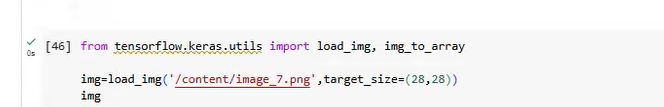

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array


In [ ]:
img=load_img('4.jpg',color_mode='grayscale',target_size=(28,28))
img=img_to_array(img)
img=img.reshape(1,784)



In [ ]:
y_pred=model3.predict(img)
y_pred

In [ ]:
img=load_img('7.jpg',color_mode='grayscale',target_size=(28,28))
img=img_to_array(img)
img=img.reshape(1,784)
y_pred=model3.predict(img)
y_pred


In [ ]:
import pickle
pickle.dump(model3,open('minst.save','wb'))

In [ ]:
model4=pickle.load(open('minst.save','rb'))

In [ ]:
#predict the y of the new img
img=load_img('7.jpg',color_mode='grayscale',target_size=(28,28))
img=img_to_array(img)/255
img=img.reshape(-1,784)

In [ ]:
yy=model4.predict(img)
yy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

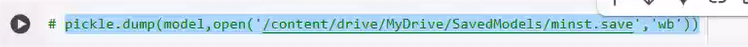

In [ ]:
pickle.dump(model3,open('/content/drive/MyDrive/Colab Notebooks/Models/minst.save','wb'))

In [ ]:
loaded_model=pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Models/minst.save','rb'))

In [ ]:
img=load_img('7.jpg',color_mode='grayscale',target_size=(28,28))
img=img_to_array(img)/255
img=img.reshape(-1,784)
yy=loaded_model.predict(img)
yy